## HCP Connectome Eigenmodes

In [1]:
%%capture --no-display

# import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.spatial import distance

# spectrome imports
from spectrome.brain import Brain
from spectrome.utils import functions, path
from spectrome.forward import eigenmode, runforward

In [2]:
# Some house keeping
hcp_dir = "../../../data"

# Define frequency range of interest
fmin = 2  # 2Hz - 45Hz signal range, filter for this with hbp
fmax = 45
fvec = np.linspace(fmin, fmax, 40)

# Load Pablo's Yeo 2017 canonical network maps
com_dk = np.load(
    "../../../data/com_dk.npy",
    allow_pickle = True
).item()
DK_df_normalized = pd.read_csv(
    "../../../data/DK_dictionary_normalized.csv"
).set_index("Unnamed: 0")
coords = np.array([com_dk[region] for region in DK_df_normalized.columns])

### Heatmaps of eigenmodes:

#### Scan $\alpha$ while holding speed and frequency constant, compute correlations:

In [5]:
alpha_vec = np.linspace(0,5,6)
num_fc = 7
num_emode = 86

# hcp_dice, create empy object with connectome
alpha_brain = Brain.Brain()
alpha_brain.add_connectome(hcp_dir)
alpha_brain.reorder_connectome(alpha_brain.connectome, alpha_brain.distance_matrix)
alpha_brain.bi_symmetric_c()
alpha_brain.reduce_extreme_dir()

# parameters other than what's being scanned:
current_speed = 10
f2w = np.abs(fvec - 10).argmin()  # 8th index = alpha ~10hz
w = 2 * np.pi * fvec[f2w]

## Correlations:
alpha_corr = np.zeros((num_emode, num_fc, len(alpha_vec)))
for avec in np.arange(0, len(alpha_vec)):
    alpha_brain.add_laplacian_eigenmodes(
        w = w,
        alpha = alpha_vec[avec],
        speed = current_speed
    )
    alpha_corr[:,:,avec] = eigenmode.get_corr_df(alpha_brain.norm_eigenmodes, DK_df_normalized, method = 'pearson')

#### Visualize:

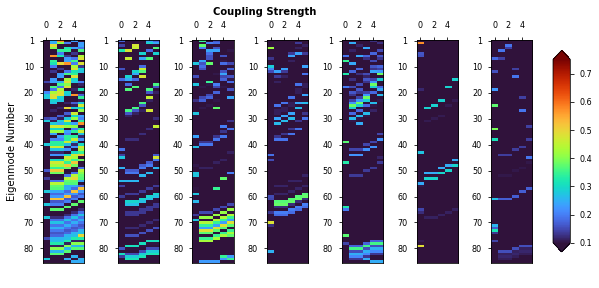

In [6]:
from matplotlib.colors import ListedColormap

turbo_colormap_data = [[0.18995,0.07176,0.23217],[0.19483,0.08339,0.26149],[0.19956,0.09498,0.29024],[0.20415,0.10652,0.31844],[0.20860,0.11802,0.34607],[0.21291,0.12947,0.37314],[0.21708,0.14087,0.39964],[0.22111,0.15223,0.42558],[0.22500,0.16354,0.45096],[0.22875,0.17481,0.47578],[0.23236,0.18603,0.50004],[0.23582,0.19720,0.52373],[0.23915,0.20833,0.54686],[0.24234,0.21941,0.56942],[0.24539,0.23044,0.59142],[0.24830,0.24143,0.61286],[0.25107,0.25237,0.63374],[0.25369,0.26327,0.65406],[0.25618,0.27412,0.67381],[0.25853,0.28492,0.69300],[0.26074,0.29568,0.71162],[0.26280,0.30639,0.72968],[0.26473,0.31706,0.74718],[0.26652,0.32768,0.76412],[0.26816,0.33825,0.78050],[0.26967,0.34878,0.79631],[0.27103,0.35926,0.81156],[0.27226,0.36970,0.82624],[0.27334,0.38008,0.84037],[0.27429,0.39043,0.85393],[0.27509,0.40072,0.86692],[0.27576,0.41097,0.87936],[0.27628,0.42118,0.89123],[0.27667,0.43134,0.90254],[0.27691,0.44145,0.91328],[0.27701,0.45152,0.92347],[0.27698,0.46153,0.93309],[0.27680,0.47151,0.94214],[0.27648,0.48144,0.95064],[0.27603,0.49132,0.95857],[0.27543,0.50115,0.96594],[0.27469,0.51094,0.97275],[0.27381,0.52069,0.97899],[0.27273,0.53040,0.98461],[0.27106,0.54015,0.98930],[0.26878,0.54995,0.99303],[0.26592,0.55979,0.99583],[0.26252,0.56967,0.99773],[0.25862,0.57958,0.99876],[0.25425,0.58950,0.99896],[0.24946,0.59943,0.99835],[0.24427,0.60937,0.99697],[0.23874,0.61931,0.99485],[0.23288,0.62923,0.99202],[0.22676,0.63913,0.98851],[0.22039,0.64901,0.98436],[0.21382,0.65886,0.97959],[0.20708,0.66866,0.97423],[0.20021,0.67842,0.96833],[0.19326,0.68812,0.96190],[0.18625,0.69775,0.95498],[0.17923,0.70732,0.94761],[0.17223,0.71680,0.93981],[0.16529,0.72620,0.93161],[0.15844,0.73551,0.92305],[0.15173,0.74472,0.91416],[0.14519,0.75381,0.90496],[0.13886,0.76279,0.89550],[0.13278,0.77165,0.88580],[0.12698,0.78037,0.87590],[0.12151,0.78896,0.86581],[0.11639,0.79740,0.85559],[0.11167,0.80569,0.84525],[0.10738,0.81381,0.83484],[0.10357,0.82177,0.82437],[0.10026,0.82955,0.81389],[0.09750,0.83714,0.80342],[0.09532,0.84455,0.79299],[0.09377,0.85175,0.78264],[0.09287,0.85875,0.77240],[0.09267,0.86554,0.76230],[0.09320,0.87211,0.75237],[0.09451,0.87844,0.74265],[0.09662,0.88454,0.73316],[0.09958,0.89040,0.72393],[0.10342,0.89600,0.71500],[0.10815,0.90142,0.70599],[0.11374,0.90673,0.69651],[0.12014,0.91193,0.68660],[0.12733,0.91701,0.67627],[0.13526,0.92197,0.66556],[0.14391,0.92680,0.65448],[0.15323,0.93151,0.64308],[0.16319,0.93609,0.63137],[0.17377,0.94053,0.61938],[0.18491,0.94484,0.60713],[0.19659,0.94901,0.59466],[0.20877,0.95304,0.58199],[0.22142,0.95692,0.56914],[0.23449,0.96065,0.55614],[0.24797,0.96423,0.54303],[0.26180,0.96765,0.52981],[0.27597,0.97092,0.51653],[0.29042,0.97403,0.50321],[0.30513,0.97697,0.48987],[0.32006,0.97974,0.47654],[0.33517,0.98234,0.46325],[0.35043,0.98477,0.45002],[0.36581,0.98702,0.43688],[0.38127,0.98909,0.42386],[0.39678,0.99098,0.41098],[0.41229,0.99268,0.39826],[0.42778,0.99419,0.38575],[0.44321,0.99551,0.37345],[0.45854,0.99663,0.36140],[0.47375,0.99755,0.34963],[0.48879,0.99828,0.33816],[0.50362,0.99879,0.32701],[0.51822,0.99910,0.31622],[0.53255,0.99919,0.30581],[0.54658,0.99907,0.29581],[0.56026,0.99873,0.28623],[0.57357,0.99817,0.27712],[0.58646,0.99739,0.26849],[0.59891,0.99638,0.26038],[0.61088,0.99514,0.25280],[0.62233,0.99366,0.24579],[0.63323,0.99195,0.23937],[0.64362,0.98999,0.23356],[0.65394,0.98775,0.22835],[0.66428,0.98524,0.22370],[0.67462,0.98246,0.21960],[0.68494,0.97941,0.21602],[0.69525,0.97610,0.21294],[0.70553,0.97255,0.21032],[0.71577,0.96875,0.20815],[0.72596,0.96470,0.20640],[0.73610,0.96043,0.20504],[0.74617,0.95593,0.20406],[0.75617,0.95121,0.20343],[0.76608,0.94627,0.20311],[0.77591,0.94113,0.20310],[0.78563,0.93579,0.20336],[0.79524,0.93025,0.20386],[0.80473,0.92452,0.20459],[0.81410,0.91861,0.20552],[0.82333,0.91253,0.20663],[0.83241,0.90627,0.20788],[0.84133,0.89986,0.20926],[0.85010,0.89328,0.21074],[0.85868,0.88655,0.21230],[0.86709,0.87968,0.21391],[0.87530,0.87267,0.21555],[0.88331,0.86553,0.21719],[0.89112,0.85826,0.21880],[0.89870,0.85087,0.22038],[0.90605,0.84337,0.22188],[0.91317,0.83576,0.22328],[0.92004,0.82806,0.22456],[0.92666,0.82025,0.22570],[0.93301,0.81236,0.22667],[0.93909,0.80439,0.22744],[0.94489,0.79634,0.22800],[0.95039,0.78823,0.22831],[0.95560,0.78005,0.22836],[0.96049,0.77181,0.22811],[0.96507,0.76352,0.22754],[0.96931,0.75519,0.22663],[0.97323,0.74682,0.22536],[0.97679,0.73842,0.22369],[0.98000,0.73000,0.22161],[0.98289,0.72140,0.21918],[0.98549,0.71250,0.21650],[0.98781,0.70330,0.21358],[0.98986,0.69382,0.21043],[0.99163,0.68408,0.20706],[0.99314,0.67408,0.20348],[0.99438,0.66386,0.19971],[0.99535,0.65341,0.19577],[0.99607,0.64277,0.19165],[0.99654,0.63193,0.18738],[0.99675,0.62093,0.18297],[0.99672,0.60977,0.17842],[0.99644,0.59846,0.17376],[0.99593,0.58703,0.16899],[0.99517,0.57549,0.16412],[0.99419,0.56386,0.15918],[0.99297,0.55214,0.15417],[0.99153,0.54036,0.14910],[0.98987,0.52854,0.14398],[0.98799,0.51667,0.13883],[0.98590,0.50479,0.13367],[0.98360,0.49291,0.12849],[0.98108,0.48104,0.12332],[0.97837,0.46920,0.11817],[0.97545,0.45740,0.11305],[0.97234,0.44565,0.10797],[0.96904,0.43399,0.10294],[0.96555,0.42241,0.09798],[0.96187,0.41093,0.09310],[0.95801,0.39958,0.08831],[0.95398,0.38836,0.08362],[0.94977,0.37729,0.07905],[0.94538,0.36638,0.07461],[0.94084,0.35566,0.07031],[0.93612,0.34513,0.06616],[0.93125,0.33482,0.06218],[0.92623,0.32473,0.05837],[0.92105,0.31489,0.05475],[0.91572,0.30530,0.05134],[0.91024,0.29599,0.04814],[0.90463,0.28696,0.04516],[0.89888,0.27824,0.04243],[0.89298,0.26981,0.03993],[0.88691,0.26152,0.03753],[0.88066,0.25334,0.03521],[0.87422,0.24526,0.03297],[0.86760,0.23730,0.03082],[0.86079,0.22945,0.02875],[0.85380,0.22170,0.02677],[0.84662,0.21407,0.02487],[0.83926,0.20654,0.02305],[0.83172,0.19912,0.02131],[0.82399,0.19182,0.01966],[0.81608,0.18462,0.01809],[0.80799,0.17753,0.01660],[0.79971,0.17055,0.01520],[0.79125,0.16368,0.01387],[0.78260,0.15693,0.01264],[0.77377,0.15028,0.01148],[0.76476,0.14374,0.01041],[0.75556,0.13731,0.00942],[0.74617,0.13098,0.00851],[0.73661,0.12477,0.00769],[0.72686,0.11867,0.00695],[0.71692,0.11268,0.00629],[0.70680,0.10680,0.00571],[0.69650,0.10102,0.00522],[0.68602,0.09536,0.00481],[0.67535,0.08980,0.00449],[0.66449,0.08436,0.00424],[0.65345,0.07902,0.00408],[0.64223,0.07380,0.00401],[0.63082,0.06868,0.00401],[0.61923,0.06367,0.00410],[0.60746,0.05878,0.00427],[0.59550,0.05399,0.00453],[0.58336,0.04931,0.00486],[0.57103,0.04474,0.00529],[0.55852,0.04028,0.00579],[0.54583,0.03593,0.00638],[0.53295,0.03169,0.00705],[0.51989,0.02756,0.00780],[0.50664,0.02354,0.00863],[0.49321,0.01963,0.00955],[0.47960,0.01583,0.01055]]
turbo = ListedColormap(turbo_colormap_data)
dynamic_range = 0.75
with plt.style.context('seaborn-paper'):
    alpha_corr_fig,(im1,im2,im3,im4,im5,im6,im7) = plt.subplots(1,7, figsize = (8.0,4.0))
    # 3 is limbic
    im = im1.imshow(alpha_corr[:,3,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im1.title.set_text(DK_df_normalized.index[3])
    #im1.title.set_weight("bold")
    im1.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im1.xaxis.set_major_locator(plt.MaxNLocator(3))
    im1.set_xticklabels([0, 0, 2, 4])
    im1.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im1.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    im = im2.imshow(alpha_corr[:,0,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im2.title.set_text(DK_df_normalized.index[0])
    #im2.title.set_weight("bold")
    im2.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im2.xaxis.set_major_locator(plt.MaxNLocator(3))
    im2.set_xticklabels([0, 0, 2, 4])
    im2.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im2.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    im = im3.imshow(alpha_corr[:,6,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im3.title.set_text(DK_df_normalized.index[6])
    #im3.title.set_weight("bold")
    im3.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im3.xaxis.set_major_locator(plt.MaxNLocator(3))
    im3.set_xticklabels([0, 0, 2, 4])
    im3.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im3.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    im = im4.imshow(alpha_corr[:,2,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im4.title.set_text(DK_df_normalized.index[2])
    #im4.title.set_weight("bold")
    im4.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im4.xaxis.set_major_locator(plt.MaxNLocator(3))
    im4.set_xticklabels([0, 0, 2, 4])
    im4.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im4.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    # Somatomotor = 4
    im = im5.imshow(alpha_corr[:,4,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im5.title.set_text(DK_df_normalized.index[4])
    #im5.title.set_weight("bold")
    im5.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im5.xaxis.set_major_locator(plt.MaxNLocator(3))
    im5.set_xticklabels([0, 0, 2, 4])
    im5.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im5.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    # Dorsal
    im = im6.imshow(alpha_corr[:,1,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im6.title.set_text('Dorsal Attention')
    #im6.title.set_weight("bold")
    im6.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im6.xaxis.set_major_locator(plt.MaxNLocator(3))
    im6.set_xticklabels([0, 0, 2, 4])
    im6.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im6.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    # Ventral
    im = im7.imshow(alpha_corr[:,5,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im7.title.set_text('Ventral Attention')
    #im7.title.set_weight("bold")
    im7.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im7.xaxis.set_major_locator(plt.MaxNLocator(3))
    im7.set_xticklabels([0, 0, 2, 4])
    im7.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im7.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    plt.suptitle('Coupling Strength', fontsize = 10, fontweight = 'bold', y = 1)
    #plt.gca().suptitle.set_weight('bold')

    cbar_ax = alpha_corr_fig.add_axes([1, 0.15, 0.03, 0.7])
    cb = alpha_corr_fig.colorbar(im, cax = cbar_ax, extend = 'both')
    alpha_corr_fig.add_subplot(1,1,1, frameon = False)
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.grid(False)
    #plt.xlabel('Coupling Strength', fontsize = 10)
    #plt.gca().xaxis.set_label_position('top') 
    plt.ylabel('Eigenmode Number', fontsize = 10)
    #plt.title('Coupling Strength', fontsize = 10)
    #plt.gca().title.set_weight('bold')
    
    plt.tight_layout()
    plt.savefig('figures/fig3/alpha.png', dpi = 300, bbox_inches = 'tight')

### With `spearmanr` instead of `pearsonr`:

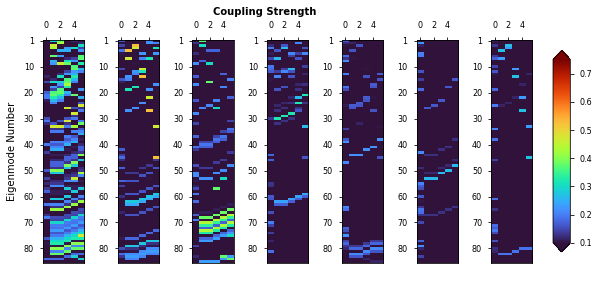

In [7]:
## Correlations:
alpha_corr = np.zeros((num_emode, num_fc, len(alpha_vec)))
for avec in np.arange(0, len(alpha_vec)):
    alpha_brain.add_laplacian_eigenmodes(
        w = w,
        alpha = alpha_vec[avec],
        speed = current_speed
    )
    alpha_corr[:,:,avec] = eigenmode.get_corr_df(alpha_brain.norm_eigenmodes, DK_df_normalized, method = 'spearman')
    
from matplotlib.colors import ListedColormap

with plt.style.context('seaborn-paper'):
    alpha_corr_fig,(im1,im2,im3,im4,im5,im6,im7) = plt.subplots(1,7, figsize = (8.0,4.0))
    # 3 is limbic
    im = im1.imshow(alpha_corr[:,3,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im1.title.set_text(DK_df_normalized.index[3])
    #im1.title.set_weight("bold")
    im1.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im1.xaxis.set_major_locator(plt.MaxNLocator(3))
    im1.set_xticklabels([0, 0, 2, 4])
    im1.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im1.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    im = im2.imshow(alpha_corr[:,0,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im2.title.set_text(DK_df_normalized.index[0])
    #im2.title.set_weight("bold")
    im2.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im2.xaxis.set_major_locator(plt.MaxNLocator(3))
    im2.set_xticklabels([0, 0, 2, 4])
    im2.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im2.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    im = im3.imshow(alpha_corr[:,6,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im3.title.set_text(DK_df_normalized.index[6])
    #im3.title.set_weight("bold")
    im3.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im3.xaxis.set_major_locator(plt.MaxNLocator(3))
    im3.set_xticklabels([0, 0, 2, 4])
    im3.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im3.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    im = im4.imshow(alpha_corr[:,2,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im4.title.set_text(DK_df_normalized.index[2])
    #im4.title.set_weight("bold")
    im4.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im4.xaxis.set_major_locator(plt.MaxNLocator(3))
    im4.set_xticklabels([0, 0, 2, 4])
    im4.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im4.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    # Somatomotor = 4
    im = im5.imshow(alpha_corr[:,4,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im5.title.set_text(DK_df_normalized.index[4])
    #im5.title.set_weight("bold")
    im5.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im5.xaxis.set_major_locator(plt.MaxNLocator(3))
    im5.set_xticklabels([0, 0, 2, 4])
    im5.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im5.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    # Dorsal
    im = im6.imshow(alpha_corr[:,1,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im6.title.set_text('Dorsal Attention')
    #im6.title.set_weight("bold")
    im6.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im6.xaxis.set_major_locator(plt.MaxNLocator(3))
    im6.set_xticklabels([0, 0, 2, 4])
    im6.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im6.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    # Ventral
    im = im7.imshow(alpha_corr[:,5,:], vmin = 0, vmax = 1, cmap = turbo, aspect = 'auto')
    #im7.title.set_text('Ventral Attention')
    #im7.title.set_weight("bold")
    im7.xaxis.set_major_locator(plt.MultipleLocator(1.5))
    im7.xaxis.set_major_locator(plt.MaxNLocator(3))
    im7.set_xticklabels([0, 0, 2, 4])
    im7.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im7.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    plt.suptitle('Coupling Strength', fontsize = 10, fontweight = 'bold', y = 1)
    #plt.gca().suptitle.set_weight('bold')

    cbar_ax = alpha_corr_fig.add_axes([1, 0.15, 0.03, 0.7])
    cb = alpha_corr_fig.colorbar(im, cax = cbar_ax, extend = 'both')
    alpha_corr_fig.add_subplot(1,1,1, frameon = False)
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.grid(False)
    #plt.xlabel('Coupling Strength', fontsize = 10)
    #plt.gca().xaxis.set_label_position('top') 
    plt.ylabel('Eigenmode Number', fontsize = 10)
    #plt.title('Coupling Strength', fontsize = 10)
    #plt.gca().title.set_weight('bold')
    
    plt.tight_layout()
    plt.savefig('figures/fig3/alpha_spearman.png', dpi = 300, bbox_inches = 'tight')

### Speed changing, hold $\alpha$ constant:

In [ ]:
speed_vec = np.linspace(5,30,6)

#hcp_dice, create empy object with connectome
speed_brain = Brain.Brain()
speed_brain.add_connectome(hcp_dir)
speed_brain.reorder_connectome(speed_brain.connectome, speed_brain.distance_matrix)
speed_brain.bi_symmetric_c()
speed_brain.reduce_extreme_dir()

# parameters other than what's being scanned:
f2w = np.abs(fvec - 10).argmin()  # 8th index = alpha ~10hz
w = 2 * np.pi * fvec[f2w]
current_alpha = 1

speed_corr = np.zeros((num_emode, num_fc, len(speed_vec)))
for svec in np.arange(0,len(speed_vec)):
    speed_brain.add_laplacian_eigenmodes(
        w=w,
        alpha=current_alpha,
        speed=speed_vec[svec],
        num_ev=86,
    )
    speed_corr[:,:,svec] = eigenmode.get_corr_df(speed_brain.norm_eigenmodes, DK_df_normalized)

In [ ]:
with plt.style.context('seaborn-paper'):
    spd_corr_fig, (ims1,ims2,ims3,ims4,ims5,ims6,ims7) = plt.subplots(1,7,figsize=(8.0,4))
    im = ims1.imshow(speed_corr[:,3,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    #ims1.title.set_text(DK_df_normalized.index[3])
    #ims1.title.set_weight('bold')
    ims1.xaxis.set_major_locator(plt.MultipleLocator(2))
    ims1.xaxis.set_major_locator(plt.MaxNLocator(3))
    ims1.set_xticklabels([0, 5, 15, 25])
    ims1.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    ims1.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    im = ims2.imshow(speed_corr[:,0,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    #ims2.title.set_text(DK_df_normalized.index[0])
    #ims2.title.set_weight("bold")
    ims2.xaxis.set_major_locator(plt.MultipleLocator(2))
    ims2.xaxis.set_major_locator(plt.MaxNLocator(3))
    ims2.set_xticklabels([0, 5, 15, 25])
    ims2.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    ims2.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    ims = ims3.imshow(speed_corr[:,6,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    #ims3.title.set_text(DK_df_normalized.index[6])
    #ims3.title.set_weight('bold')
    ims3.xaxis.set_major_locator(plt.MultipleLocator(2))
    ims3.xaxis.set_major_locator(plt.MaxNLocator(3))
    ims3.set_xticklabels([0, 5, 15, 25])
    ims3.xaxis.tick_top()
    ims3.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = ims4.imshow(speed_corr[:,2,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    #ims4.title.set_text(DK_df_normalized.index[2])
    #ims4.title.set_weight('bold')
    ims4.xaxis.set_major_locator(plt.MultipleLocator(2))
    ims4.xaxis.set_major_locator(plt.MaxNLocator(3))
    ims4.set_xticklabels([0, 5, 15, 25])
    ims4.xaxis.tick_top()
    ims4.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = ims5.imshow(speed_corr[:,4,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    #ims5.title.set_text(DK_df_normalized.index[4])
    #ims5.title.set_weight('bold')
    ims5.xaxis.set_major_locator(plt.MultipleLocator(2))
    ims5.xaxis.set_major_locator(plt.MaxNLocator(3))
    ims5.set_xticklabels([0, 5, 15, 25])
    ims5.xaxis.tick_top()
    ims5.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = ims6.imshow(speed_corr[:,1,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    #ims6.title.set_text(DK_df_normalized.index[1])
    #ims6.title.set_weight("bold")
    ims6.xaxis.set_major_locator(plt.MultipleLocator(2))
    ims6.xaxis.set_major_locator(plt.MaxNLocator(3))
    ims6.set_xticklabels([0, 5, 15, 25])
    ims6.xaxis.tick_top()
    ims6.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = ims7.imshow(speed_corr[:,5,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    #ims7.title.set_text(DK_df_normalized.index[5])
    #ims7.title.set_weight('bold')
    ims7.xaxis.set_major_locator(plt.MultipleLocator(2))
    ims7.xaxis.set_major_locator(plt.MaxNLocator(3))
    ims7.set_xticklabels([0, 5, 15, 25])
    ims7.xaxis.tick_top()
    ims7.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    plt.suptitle('Transmission Velocity (m/s)', fontsize = 10, fontweight = 'bold', y = 1)
    
    #colorbar
    cbar_ax = spd_corr_fig.add_axes([1, 0.15, 0.03, 0.7])
    cb = spd_corr_fig.colorbar(im, cax = cbar_ax, extend = 'both')
    # Create big axis and hide:
    spd_corr_fig.add_subplot(1,1,1, frameon = False)
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.grid(False)
    plt.ylabel('Eigenmode Number', fontsize = 10)
    
    plt.tight_layout()
    plt.savefig('figures/fig3/speed.png', dpi = 300, bbox_inches = 'tight')

### Sweep frequency, speed constant, at $\alpha = 1, 2$ :

In [ ]:
freq_vec = np.linspace(0,40,9)

#hcp_dice, create empy object with connectome
freq_brain = Brain.Brain()
freq_brain.add_connectome(hcp_dir)
freq_brain.reorder_connectome(freq_brain.connectome, freq_brain.distance_matrix)
freq_brain.bi_symmetric_c()
freq_brain.reduce_extreme_dir()

# parameters other than what's being scanned:
f2w = np.abs(fvec - 10).argmin()  # 8th index = alpha ~10hz
w = 2 * np.pi * fvec[f2w]
current_alpha = 1
current_speed = 10

freq_corr = np.zeros((num_emode, num_fc, len(freq_vec)))
for fv in np.arange(0,len(freq_vec)):
    freq_brain.add_laplacian_eigenmodes(
        w=2*np.pi*freq_vec[fv],
        alpha=current_alpha,
        speed=current_speed,
        num_ev=86,
    )
    freq_corr[:,:,fv] = eigenmode.get_corr_df(freq_brain.norm_eigenmodes, DK_df_normalized)

In [ ]:
with plt.style.context('seaborn-paper'):
    freq_corr_fig, (imf1,imf2,imf3,imf4,imf5,imf6,imf7) = plt.subplots(1,7,figsize=(8,4.5))
    im = imf1.imshow(freq_corr[:,3,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf1.set_title(DK_df_normalized.index[3], y = -0.07, fontsize = 8, weight = 'bold')
    imf1.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imf1.set_xticklabels([0, 20, 40])
    imf1.xaxis.tick_top()
    imf1.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = imf2.imshow(freq_corr[:,0,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf2.set_title(DK_df_normalized.index[0], y = -0.07, fontsize = 8, weight = 'bold')
    imf2.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imf2.set_xticklabels([0, 20, 40])
    imf2.xaxis.tick_top()
    imf2.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    ims = imf3.imshow(freq_corr[:,6,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf3.set_title(DK_df_normalized.index[6], y = -0.07, fontsize = 8, weight = 'bold')
    imf3.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imf3.set_xticklabels([0, 20, 40])
    imf3.xaxis.tick_top()
    imf3.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = imf4.imshow(freq_corr[:,2,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf4.set_title(r'Fronto-' '\n' 'parietal', y = -0.1, fontsize = 8, weight = 'bold')
    imf4.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imf4.set_xticklabels([0, 20, 40])
    imf4.xaxis.tick_top()
    imf4.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = imf5.imshow(freq_corr[:,4,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf5.set_title(r'Somato-' '\n' 'motor', y = -0.1,  fontsize = 8, weight = 'bold')
    imf5.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imf5.set_xticklabels([0, 20, 40])
    imf5.xaxis.tick_top()
    imf5.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = imf6.imshow(freq_corr[:,1,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf6.set_title('Dorsal' '\n' 'Attention', y = -0.1, fontsize = 8, weight = 'bold')
    imf6.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imf6.set_xticklabels([0, 20, 40])
    imf6.xaxis.tick_top()
    imf6.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = imf7.imshow(freq_corr[:,5,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf7.set_title('Ventral' '\n' 'Attention', y = -0.1, fontsize = 8, weight = 'bold')
    imf7.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imf7.set_xticklabels([0, 20, 40])
    imf7.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    imf7.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    plt.suptitle('Frequency (Hz)', fontsize = 10, fontweight = 'bold', y = 1)
    
    #colorbar
    cbar_ax = freq_corr_fig.add_axes([1, 0.15, 0.03, 0.7])
    cb = freq_corr_fig.colorbar(im, cax = cbar_ax, extend = 'both')
    # Create big axis and hide:
    freq_corr_fig.add_subplot(1,1,1, frameon = False)
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.grid(False)
    #plt.ylabel('Frequency (Hz)', fontsize = 13)
    plt.ylabel('Eigenmode Number', fontsize = 10)
    
    # add network names
    
    
    plt.tight_layout()
    plt.savefig('figures/fig3/freq_png', dpi = 300, bbox_inches = 'tight')

## Using 2 parameters $\alpha$ and $\phi$, where $\phi = \omega/\nu$:

Scan through all $\phi$:

In [8]:
phi_vec = np.linspace(0,50,11)

#hcp_dice, create empy object with connectome
phi_brain = Brain.Brain()
phi_brain.add_connectome(hcp_dir)
phi_brain.reorder_connectome(phi_brain.connectome, phi_brain.distance_matrix)
phi_brain.bi_symmetric_c()
phi_brain.reduce_extreme_dir()

# parameters other than what's being scanned:
current_alpha = 1

phi_corr = np.zeros((num_emode, num_fc, len(phi_vec)))

for p in np.arange(0,len(phi_vec)):
    phi_brain.decompose_complex_laplacian(
        alpha = current_alpha,
        phi = phi_vec[p],
        num_ev = 86
    )
    phi_corr[:,:,p] = eigenmode.get_corr_df(phi_brain.norm_eigenmodes, DK_df_normalized, method = 'spearman')

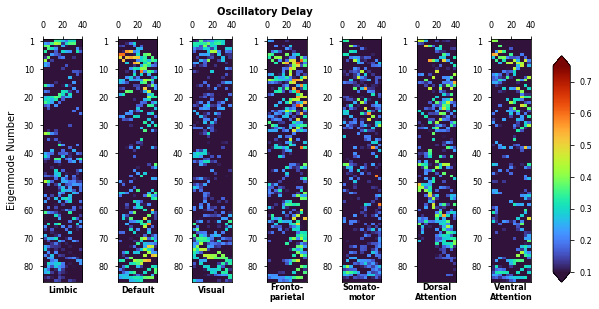

In [9]:
with plt.style.context('seaborn-paper'):
    phi_corr_fig, (imp1,imp2,imp3,imp4,imp5,imp6,imp7) = plt.subplots(1,7,figsize=(8,4.5))
    im = imp1.imshow(phi_corr[:,3,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imp1.set_title(DK_df_normalized.index[3], y = -0.07, fontsize = 8, weight = 'bold')
    imp1.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imp1.set_xticklabels([0, 20, 40])
    imp1.xaxis.tick_top()
    imp1.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = imp2.imshow(phi_corr[:,0,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imp2.set_title(DK_df_normalized.index[0], y = -0.07, fontsize = 8, weight = 'bold')
    imp2.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imp2.set_xticklabels([0, 20, 40])
    imp2.xaxis.tick_top()
    imp2.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    ims = imp3.imshow(phi_corr[:,6,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imp3.set_title(DK_df_normalized.index[6], y = -0.07, fontsize = 8, weight = 'bold')
    imp3.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imp3.set_xticklabels([0, 20, 40])
    imp3.xaxis.tick_top()
    imp3.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = imp4.imshow(phi_corr[:,2,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imp4.set_title(r'Fronto-' '\n' 'parietal', y = -0.1, fontsize = 8, weight = 'bold')
    imp4.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imp4.set_xticklabels([0, 20, 40])
    imp4.xaxis.tick_top()
    imp4.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = imp5.imshow(phi_corr[:,4,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imp5.set_title(r'Somato-' '\n' 'motor', y = -0.1,  fontsize = 8, weight = 'bold')
    imp5.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imp5.set_xticklabels([0, 20, 40])
    imp5.xaxis.tick_top()
    imp5.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = imp6.imshow(phi_corr[:,1,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imp6.set_title('Dorsal' '\n' 'Attention', y = -0.1, fontsize = 8, weight = 'bold')
    imp6.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imp6.set_xticklabels([0, 20, 40])
    imp6.xaxis.tick_top()
    imp6.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    im.set_clim(0.1,dynamic_range)
    
    im = imp7.imshow(phi_corr[:,5,:],vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imp7.set_title('Ventral' '\n' 'Attention', y = -0.1, fontsize = 8, weight = 'bold')
    imp7.xaxis.set_major_locator(plt.LinearLocator(numticks = 3))
    imp7.set_xticklabels([0, 20, 40])
    imp7.set_yticklabels([0, 1, 10, 20, 30, 40, 50, 60, 70, 80])
    imp7.xaxis.tick_top()
    im.set_clim(0.1,dynamic_range)
    
    plt.suptitle('Characteristic Length', fontsize = 10, fontweight = 'bold', y = 1)
    # (v/f) - express x-axis in units of mm
    #colorbar
    cbar_ax = phi_corr_fig.add_axes([1, 0.15, 0.03, 0.7])
    cb = phi_corr_fig.colorbar(im, cax = cbar_ax, extend = 'both')
    # Create big axis and hide:
    phi_corr_fig.add_subplot(1,1,1, frameon = False)
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.grid(False)
    #plt.ylabel('Frequency (Hz)', fontsize = 13)
    plt.ylabel('Eigenmode Number', fontsize = 10)
    
    # add network names
    
    
    plt.tight_layout()
    plt.savefig('figures/fig3/phi.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
# try alpha = 2:
current_alpha = 2

freq_corr = np.zeros((num_emode, num_fc, len(freq_vec)))
for fv in np.arange(0,len(freq_vec)):
    freq_brain.add_laplacian_eigenmodes(
        w=2*np.pi*freq_vec[fv],
        alpha=current_alpha,
        speed=current_speed,
        num_ev=86,
    )
    freq_corr[:,:,fv] = eigenmode.get_corr_df(freq_brain.norm_eigenmodes, DK_df_normalized)
    
with plt.style.context('seaborn'):
    freq_corr_fig, (imf1,imf2,imf3,imf4,imf5,imf6,imf7) = plt.subplots(7,1,figsize=(8,10))
    im = imf1.imshow(np.transpose(freq_corr[:,3,:]),vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf1.title.set_text(DK_df_normalized.index[3])
    imf1.title.set_weight('bold')
    imf1.yaxis.set_major_locator(plt.MultipleLocator(2))
    imf1.yaxis.set_major_locator(plt.MaxNLocator(5))
    imf1.set_yticklabels([0, 0, 10, 20, 30, 40])
    im.set_clim(0.1,0.9)
    
    im = imf2.imshow(np.transpose(freq_corr[:,0,:]),vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf2.title.set_text(DK_df_normalized.index[0])
    imf2.title.set_weight("bold")
    imf2.yaxis.set_major_locator(plt.MultipleLocator(2))
    imf2.yaxis.set_major_locator(plt.MaxNLocator(5))
    imf2.set_yticklabels([0, 0, 10, 20, 30, 40])
    im.set_clim(0.1,0.9)
    
    ims = imf3.imshow(np.transpose(freq_corr[:,6,:]),vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf3.title.set_text(DK_df_normalized.index[6])
    imf3.title.set_weight('bold')
    imf3.yaxis.set_major_locator(plt.MultipleLocator(2))
    imf3.yaxis.set_major_locator(plt.MaxNLocator(5))
    imf3.set_yticklabels([0, 0, 10, 20, 30, 40])
    im.set_clim(0.1,0.9)
    
    im = imf4.imshow(np.transpose(freq_corr[:,2,:]),vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf4.title.set_text(DK_df_normalized.index[2])
    imf4.title.set_weight('bold')
    imf4.yaxis.set_major_locator(plt.MultipleLocator(2))
    imf4.yaxis.set_major_locator(plt.MaxNLocator(5))
    imf4.set_yticklabels([0, 0, 10, 20, 30, 40])
    im.set_clim(0.1,0.9)
    
    im = imf5.imshow(np.transpose(freq_corr[:,4,:]),vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf5.title.set_text(DK_df_normalized.index[4])
    imf5.title.set_weight('bold')
    imf5.yaxis.set_major_locator(plt.MultipleLocator(2))
    imf5.yaxis.set_major_locator(plt.MaxNLocator(5))
    imf5.set_yticklabels([0, 0, 10, 20, 30, 40])
    im.set_clim(0.1,0.9)
    
    im = imf6.imshow(np.transpose(freq_corr[:,1,:]),vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf6.title.set_text(DK_df_normalized.index[1])
    imf6.title.set_weight("bold")
    imf6.yaxis.set_major_locator(plt.MultipleLocator(2))
    imf6.yaxis.set_major_locator(plt.MaxNLocator(5))
    imf6.set_yticklabels([0, 0, 10, 20, 30, 40])
    im.set_clim(0.1,0.9)
    
    im = imf7.imshow(np.transpose(freq_corr[:,5,:]),vmin=0, vmax=1, cmap=turbo, aspect='auto')
    imf7.title.set_text(DK_df_normalized.index[5])
    imf7.title.set_weight('bold')
    imf7.yaxis.set_major_locator(plt.MultipleLocator(2))
    imf7.yaxis.set_major_locator(plt.MaxNLocator(5))
    imf7.set_yticklabels([0, 0, 10, 20, 30, 40])
    im.set_clim(0.1,0.9)
    
    #colorbar
    cbar_ax = freq_corr_fig.add_axes([1, 0.15, 0.03, 0.7])
    cb = freq_corr_fig.colorbar(im, cax = cbar_ax, extend = 'both')
    # Create big axis and hide:
    freq_corr_fig.add_subplot(1,1,1, frameon = False)
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.grid(False)
    plt.ylabel('Frequency (Hz)', fontsize = 13)
    plt.xlabel('Ranked Eigenmodes', fontsize = 13)
    
    plt.tight_layout()